In [63]:
import torch
import torch.nn as nn
import torch.optim as op
from torch.utils.data import TensorDataset, DataLoader
from Stock_Predictor_Func import load_data, preprocess_data, create_sequences, StockPredictor, train_model, loss_over_time, corrected_Prediction_Dates, add_percent_change, calculate_accuracy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math

In [64]:
stock_ticker = 'SPY'
start_date = '2016-01-01'
interval = "1d"

In [65]:
stock_data = load_data(stock_ticker, start_date, interval=interval)

[*********************100%%**********************]  1 of 1 completed


In [66]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,MACD_Line,Signal_Line,MACD_Histogram,RSI,Stoch_K,Stoch_D,SMA_10,EMA_10,VWAP
Date,,,,,,,,,,,,,,,
2016-01-04,200.490005,201.029999,198.589996,201.020004,174.583954,222353500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.213333
2016-01-05,201.399994,201.899994,200.050003,201.360001,174.879257,110845800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201.103333
2016-01-06,198.339996,200.059998,197.600006,198.820007,172.673279,152112600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198.826670
2016-01-07,195.330002,197.440002,193.589996,194.050003,168.530609,213436100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.026667
2016-01-08,195.190002,195.850006,191.580002,191.919998,166.680725,209817200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.116669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-19,477.649994,482.720001,476.540009,482.429993,482.429993,110733300,4.163090,4.418980,-0.255889,67.519347,76.344386,70.212098,475.213000,475.772487,480.563334
2024-01-22,484.010010,485.220001,482.779999,483.450012,483.450012,75844900,4.507764,4.436737,0.071028,68.484767,90.487349,77.905827,476.766000,477.168400,483.816671
2024-01-23,484.010010,485.109985,482.890015,484.859985,484.859985,49945300,4.838914,4.517172,0.321742,69.820119,95.627959,87.486565,477.791998,478.566870,484.286662


In [67]:
PreProc_data = preprocess_data(stock_data)

In [68]:
PreProc_data

,Open,High,Low,Close,Adj Close,Volume,MACD_Line,Signal_Line,MACD_Histogram,RSI,Stoch_K,Stoch_D,SMA_10,EMA_10,VWAP,Returns
Date,,,,,,,,,,,,,,,,
2016-02-22,193.869995,194.949997,193.789993,194.779999,169.164627,103640300,-0.215321,-1.495828,1.280507,58.038127,87.063343,82.706969,188.714000,190.626763,194.506663,1.447950
2016-02-23,194.000000,194.320007,192.179993,192.320007,167.028137,111455300,-0.047329,-1.206128,1.158799,52.703426,86.890928,85.741942,189.404001,190.934625,192.940002,-1.262965
2016-02-24,190.630005,193.529999,189.320007,193.199997,167.792358,150812200,0.155026,-0.933897,1.088923,54.320920,89.057269,87.670513,190.181001,191.346511,192.016668,0.457540
2016-02-25,193.729996,195.550003,192.830002,195.539993,169.824570,110728300,0.498466,-0.647425,1.145891,58.395438,89.443040,88.463746,191.208000,192.108962,194.639999,1.211147
2016-02-26,196.570007,196.679993,194.899994,195.089996,169.433792,129833700,0.725966,-0.372747,1.098712,57.336264,92.368563,90.289624,192.431000,192.650969,195.556661,-0.230107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-19,477.649994,482.720001,476.540009,482.429993,482.429993,110733300,4.163090,4.418980,-0.255889,67.519347,76.344386,70.212098,475.213000,475.772487,480.563334,1.246616
2024-01-22,484.010010,485.220001,482.779999,483.450012,483.450012,75844900,4.507764,4.436737,0.071028,68.484767,90.487349,77.905827,476.766000,477.168400,483.816671,0.211434
2024-01-23,484.010010,485.109985,482.890015,484.859985,484.859985,49945300,4.838914,4.517172,0.321742,69.820119,95.627959,87.486565,477.791998,478.566870,484.286662,0.291648


In [69]:
#Normalization
feature_columns = PreProc_data.columns.tolist()
non_feature_columns = ['Adj Close', 'Returns']  # Adjust as needed
feature_columns = [col for col in feature_columns if col not in non_feature_columns]

features_to_normalize = PreProc_data[feature_columns]

scalar = StandardScaler()

normalized_features = scalar.fit_transform(features_to_normalize)

PreProc_data[feature_columns] = normalized_features

In [70]:
#Sequences
sequence_length = len(PreProc_data.columns)
prediction_window = 30 #Predicting how many days in the future

sequences, targets = create_sequences(PreProc_data, sequence_length)


In [71]:
sequences

tensor([[[-1.6344, -1.6329, -1.6229,  ..., -1.6712, -1.6268,  1.4480],
         [-1.6328, -1.6405, -1.6425,  ..., -1.6675, -1.6458, -1.2630],
         [-1.6736, -1.6500, -1.6774,  ..., -1.6625, -1.6570,  0.4575],
         ...,
         [-1.5606, -1.5592, -1.5791,  ..., -1.5801, -1.5683,  0.0802],
         [-1.5449, -1.5383, -1.5530,  ..., -1.5699, -1.5397,  1.6137],
         [-1.5340, -1.5355, -1.5255,  ..., -1.5621, -1.5307, -0.1282]],

        [[-1.6328, -1.6405, -1.6425,  ..., -1.6675, -1.6458, -1.2630],
         [-1.6736, -1.6500, -1.6774,  ..., -1.6625, -1.6570,  0.4575],
         [-1.6361, -1.6257, -1.6346,  ..., -1.6532, -1.6252,  1.2111],
         ...,
         [-1.5449, -1.5383, -1.5530,  ..., -1.5699, -1.5397,  1.6137],
         [-1.5340, -1.5355, -1.5255,  ..., -1.5621, -1.5307, -0.1282],
         [-1.5437, -1.5417, -1.5343,  ..., -1.5564, -1.5370, -0.1630]],

        [[-1.6736, -1.6500, -1.6774,  ..., -1.6625, -1.6570,  0.4575],
         [-1.6361, -1.6257, -1.6346,  ..., -1

In [72]:
targets

tensor([[175.5827],
        [176.5989],
        [177.7192],
        ...,
        [484.8600],
        [485.3900],
        [488.0300]])

In [73]:
torch.Tensor.size(sequences)

torch.Size([1980, 16, 16])

In [74]:
sequences[2]

tensor([[-1.6736e+00, -1.6500e+00, -1.6774e+00, -1.6429e+00,  1.6779e+02,
          1.6226e+00, -2.1805e-01, -5.3981e-01,  8.6488e-01, -1.4982e-01,
          8.3619e-01,  8.1230e-01, -1.6754e+00, -1.6625e+00, -1.6570e+00,
          4.5754e-01],
        [-1.6361e+00, -1.6257e+00, -1.6346e+00, -1.6146e+00,  1.6982e+02,
          6.3293e-01, -1.2743e-01, -4.5851e-01,  9.1069e-01,  2.0664e-01,
          8.4988e-01,  8.4136e-01, -1.6629e+00, -1.6532e+00, -1.6252e+00,
          1.2111e+00],
        [-1.6017e+00, -1.6121e+00, -1.6093e+00, -1.6200e+00,  1.6943e+02,
          1.1046e+00, -6.7398e-02, -3.8055e-01,  8.7276e-01,  1.1398e-01,
          9.5372e-01,  9.0823e-01, -1.6481e+00, -1.6466e+00, -1.6141e+00,
         -2.3011e-01],
        [-1.6194e+00, -1.6175e+00, -1.6285e+00, -1.6386e+00,  1.6811e+02,
          1.0080e+00, -5.4755e-02, -3.1547e-01,  7.2690e-01, -1.9841e-01,
          8.6633e-01,  9.1860e-01, -1.6397e+00, -1.6446e+00, -1.6284e+00,
         -7.8425e-01],
        [-1.6206e+00

In [75]:
split_ratio = 0.8
split_index = int(split_ratio * len(sequences))

train_sequences, test_sequences = sequences[:split_index], sequences[split_index:]
train_targets, test_targets = targets[:split_index], targets[split_index:]

#Conversion to dataloader
train_data = TensorDataset(train_sequences, train_targets)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)


In [76]:
train_targets

tensor([[175.5827],
        [176.5989],
        [177.7192],
        ...,
        [380.9189],
        [379.4639],
        [371.7104]])

In [77]:
#Hyperparameters
input_size = sequence_length
hidden_size = 64
num_layers = 2
output_size = 1 #Assume a prediction of one value (stock price)

model = StockPredictor(input_size, hidden_size, num_layers, output_size)


In [78]:
#Training paramaters
num_epochs = 1000
learning_rate = 0.001
criterion = nn.MSELoss()
optimizer = op.Adam(model.parameters(), lr=learning_rate)

#Training
print(f'Learning Rate: {learning_rate}')
loss_of_model = train_model(model, train_loader, num_epochs, criterion, optimizer, track_losses=True)

Learning Rate: 0.001
Epoch: [10/1000], Loss: 57468.7539
Epoch: [20/1000], Loss: 47540.2305
Epoch: [30/1000], Loss: 56091.3750
Epoch: [40/1000], Loss: 33280.8828
Epoch: [50/1000], Loss: 23449.1191
Epoch: [60/1000], Loss: 30859.5488
Epoch: [70/1000], Loss: 9107.9316
Epoch: [80/1000], Loss: 13628.8496
Epoch: [90/1000], Loss: 3824.0923
Epoch: [100/1000], Loss: 9210.5693
Epoch: [110/1000], Loss: 10625.3740
Epoch: [120/1000], Loss: 4326.1587
Epoch: [130/1000], Loss: 9544.0791
Epoch: [140/1000], Loss: 2386.2686
Epoch: [150/1000], Loss: 4565.1763
Epoch: [160/1000], Loss: 3905.8506
Epoch: [170/1000], Loss: 2578.8525
Epoch: [180/1000], Loss: 1147.2300
Epoch: [190/1000], Loss: 317.8179
Epoch: [200/1000], Loss: 155.0928
Epoch: [210/1000], Loss: 138.7991
Epoch: [220/1000], Loss: 724.4090
Epoch: [230/1000], Loss: 137.5319
Epoch: [240/1000], Loss: 28.0793
Epoch: [250/1000], Loss: 40.0075
Epoch: [260/1000], Loss: 62.9008
Epoch: [270/1000], Loss: 27.9717
Epoch: [280/1000], Loss: 51.9721
Epoch: [290/100

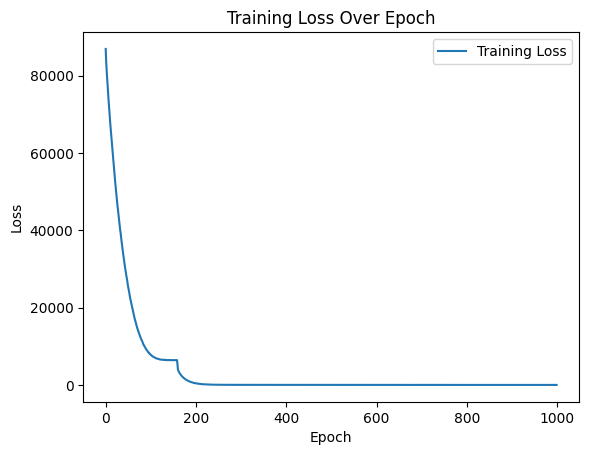

In [79]:
loss_over_time(loss_of_model)

In [80]:
#Evaluation
model.eval()
with torch.no_grad():
    test_predictions = model(test_sequences)

print("Model Predictions: ", test_predictions)


Model Predictions:  tensor([[373.3782],
        [374.7480],
        [374.3363],
        [379.3734],
        [377.1159],
        [380.1555],
        [383.4291],
        [381.7946],
        [375.3007],
        [377.9503],
        [371.3402],
        [366.1775],
        [376.7436],
        [372.2840],
        [378.7242],
        [379.9130],
        [385.6943],
        [383.2712],
        [380.9413],
        [375.5251],
        [388.3625],
        [396.4006],
        [400.8896],
        [398.7264],
        [394.4130],
        [403.0314],
        [400.2205],
        [397.0367],
        [396.7648],
        [396.6983],
        [404.9395],
        [403.8906],
        [412.4594],
        [412.6383],
        [413.2482],
        [409.8499],
        [412.3599],
        [409.6949],
        [405.1618],
        [404.1853],
        [402.3115],
        [405.0492],
        [399.5164],
        [401.4718],
        [401.4936],
        [399.9037],
        [394.8775],
        [383.5302],
        [378.2847],


In [81]:
print("Actual Results: ", test_targets)

Actual Results:  tensor([[371.4077],
        [368.3903],
        [372.2866],
        [372.9896],
        [374.2494],
        [379.8545],
        [379.5421],
        [375.2063],
        [371.8862],
        [369.9332],
        [369.0348],
        [376.0852],
        [372.9799],
        [383.0575],
        [385.4988],
        [389.4244],
        [385.8113],
        [386.2800],
        [381.7100],
        [391.6216],
        [396.5334],
        [402.3144],
        [401.1230],
        [398.4767],
        [404.7166],
        [404.4432],
        [403.7596],
        [403.2909],
        [401.6894],
        [410.1265],
        [410.1265],
        [417.0695],
        [418.7882],
        [419.6085],
        [416.6301],
        [417.8410],
        [412.2260],
        [403.6424],
        [402.6660],
        [403.9550],
        [409.6578],
        [395.7912],
        [393.1742],
        [388.8580],
        [385.8991],
        [387.1101],
        [383.0282],
        [381.5830],
        [388.4381],
   

In [82]:
predictions_df = pd.DataFrame({'Date': PreProc_data.index[-len(test_predictions):], 'Predicted': test_predictions.view(-1).numpy()})
targets_df = pd.DataFrame({'Date': PreProc_data.index[-len(test_targets):], 'Actual': test_targets.view(-1).numpy()})

predictions_df.set_index('Date', inplace=True)
targets_df.set_index('Date', inplace=True)

In [83]:
predictions_df

,Predicted
Date,
2022-06-29,373.378204
2022-06-30,374.747955
2022-07-01,374.336273
2022-07-05,379.373383
2022-07-06,377.115936
...,...
2024-01-19,445.547272
2024-01-22,444.754181
2024-01-23,444.093750


In [84]:
targets_df

,Actual
Date,
2022-06-29,371.407684
2022-06-30,368.390259
2022-07-01,372.286591
2022-07-05,372.989624
2022-07-06,374.249359
...,...
2024-01-19,482.429993
2024-01-22,483.450012
2024-01-23,484.859985


In [85]:
#Correcting Prediction Dates
predictions_df = corrected_Prediction_Dates(predictions_df)
predictions_df

,Predicted
Date,
2022-06-30,373.378204
2022-07-01,374.747955
2022-07-05,374.336273
2022-07-06,379.373383
2022-07-07,377.115936
...,...
2024-01-22,445.547272
2024-01-23,444.754181
2024-01-24,444.093750


In [86]:
result_df = pd.merge(predictions_df, targets_df, on='Date', how='outer')

In [87]:
result_df.reset_index(inplace=True)

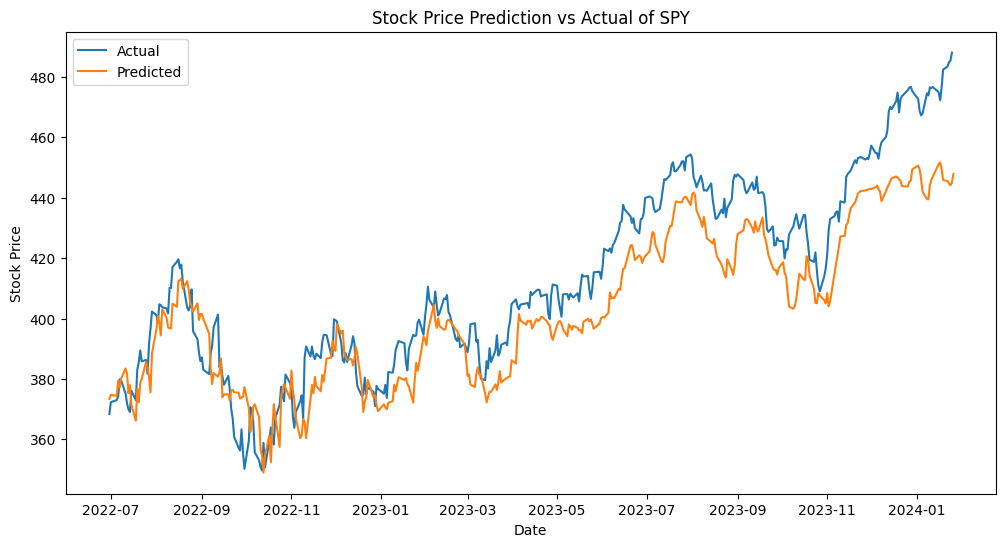

In [88]:
plt.figure(figsize=(12, 6))
plt.plot(result_df['Date'], result_df['Actual'], label='Actual')
plt.plot(result_df['Date'], result_df['Predicted'], label='Predicted')
plt.title(f'Stock Price Prediction vs Actual of {stock_ticker}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [89]:
MSE = mean_squared_error(predictions_df, targets_df)
print(f'Mean Squared Error: {MSE:.4f}')
print(f'Root Mean Squared Error: {math.sqrt(MSE):.4f}')

Mean Squared Error: 191.1641
Root Mean Squared Error: 13.8262


In [90]:
predictions_df = add_percent_change(predictions_df)
targets_df = add_percent_change(targets_df, value = "Actual")
predictions_df

,Predicted,Change (%),Up/Down (1/0)
Date,,,
2022-06-30,373.378204,NaN,0
2022-07-01,374.747955,0.366855,1
2022-07-05,374.336273,-0.109857,0
2022-07-06,379.373383,1.345611,1
2022-07-07,377.115936,-0.595045,0
...,...,...,...
2024-01-22,445.547272,-0.071645,0
2024-01-23,444.754181,-0.178003,0
2024-01-24,444.093750,-0.148493,0


In [91]:
targets_df

,Actual,Change (%),Up/Down (1/0)
Date,,,
2022-06-29,371.407684,NaN,0
2022-06-30,368.390259,-0.812429,0
2022-07-01,372.286591,1.057661,1
2022-07-05,372.989624,0.188839,1
2022-07-06,374.249359,0.337744,1
...,...,...,...
2024-01-19,482.429993,1.246619,1
2024-01-22,483.450012,0.211430,1
2024-01-23,484.859985,0.291646,1


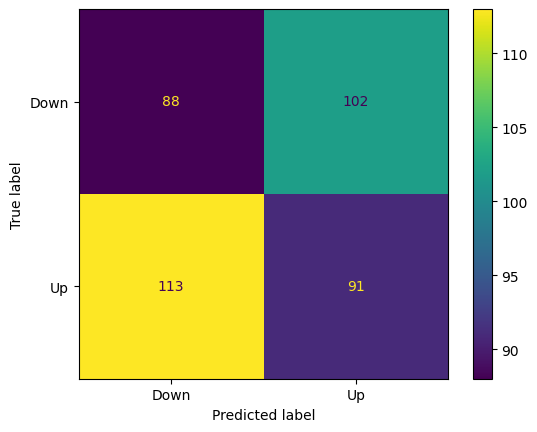

Accuracy: 45.431%
Precision: 47.15%
Sensitivity: 0.44607843137254904
Specificity: 0.4631578947368421
F1_score: 0.45843828715365237


[0.4543147208121827,
 0.47150259067357514,
 0.44607843137254904,
 0.4631578947368421,
 0.45843828715365237]

In [92]:
calculate_accuracy(predictions_df, targets_df)

In [93]:
#Training Data
with torch.no_grad():
    training_predictions = model(train_sequences)


